In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


temp_path = "Resources/GlobalTemperatures.csv"

temp_data = pd.read_csv(temp_path,low_memory=False)


temp_data.head(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#remove column
temp_data = temp_data[["dt", "LandAverageTemperature"]]
temp_data.head(10)

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
5,1750-06-01,12.937
6,1750-07-01,15.868
7,1750-08-01,14.750
8,1750-09-01,11.413
9,1750-10-01,6.367


In [3]:
#convert the dt column into datetime
temp_data["dt"]=pd.to_datetime(temp_data["dt"],format="%Y-%m-%d")
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dt                      3192 non-null   datetime64[ns]
 1   LandAverageTemperature  3180 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.0 KB


In [4]:
#drop na
temp_data = temp_data.dropna()
temp_data

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
...,...,...
3187,2015-08-01,14.755
3188,2015-09-01,12.999
3189,2015-10-01,10.801
3190,2015-11-01,7.433


In [5]:
#set dt as index to filter the data
temp_data.set_index("dt",inplace=True)
temp_data.head()

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573


In [6]:
#introduce the prophet 
from prophet import Prophet

In [7]:
#slice the data for the latest 100 years and prep the data to fit prophet
temp_data=temp_data["1915-01-01":]
temp_data.reset_index(inplace=True)
temp_data.rename(columns={"dt":"ds","LandAverageTemperature":"y"},inplace=True)
temp_data.head()

/Users/jadeqin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ds,y
0,1915-01-01,2.299
1,1915-02-01,3.265
2,1915-03-01,5.143
3,1915-04-01,8.705
4,1915-05-01,11.493


In [8]:
#fit the model
model = Prophet()
model.fit(temp_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = model.make_future_dataframe(periods=3650)
future.tail()

,ds
4857,2025-11-24
4858,2025-11-25
4859,2025-11-26
4860,2025-11-27
4861,2025-11-28


In [10]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4857,2025-11-24,6.586101,6.205014,6.984316
4858,2025-11-25,6.400631,6.022669,6.783001
4859,2025-11-26,6.200195,5.793385,6.612985
4860,2025-11-27,5.986429,5.586999,6.360282
4861,2025-11-28,5.761290,5.375603,6.148037


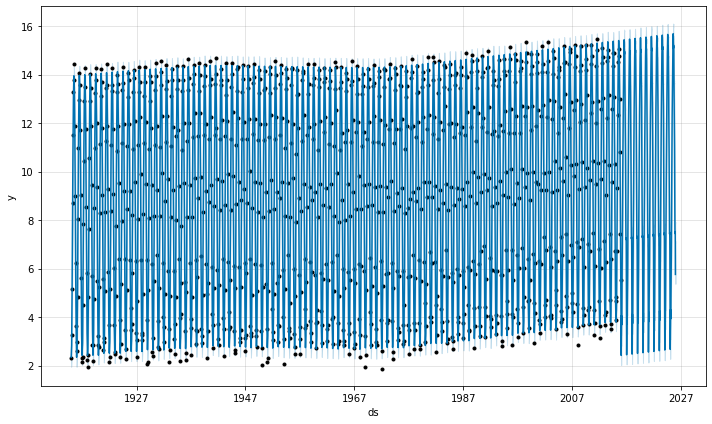

In [11]:
fig1 = model.plot(forecast)

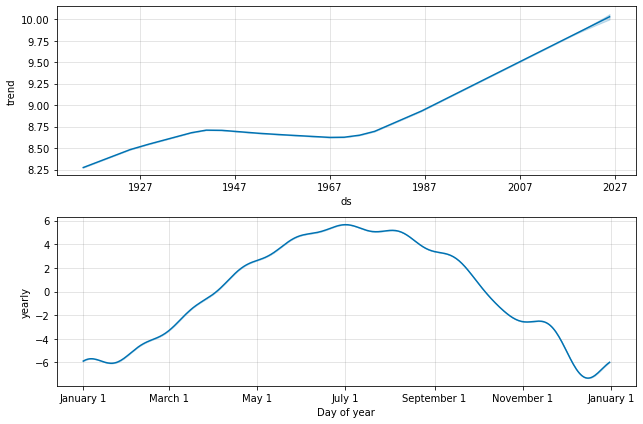

In [12]:
fig2 = model.plot_components(forecast)

In [13]:
from prophet.plot import plot_plotly, plot_components_plotly

In [14]:
plot_plotly(model, forecast)

In [15]:
plot_components_plotly(model, forecast)

In [16]:
#saving the model
import json
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    json.dump(model_to_json(model), fout)  # Save model

with open('serialized_model.json', 'r') as fin:
    m = model_from_json(json.load(fin)) # load model

In [17]:
#test and see if the model works (both json and pickle worked)
future2 = m.make_future_dataframe(periods=7300)
forecast2 = m.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
8507,2035-11-22,7.253409,6.847531,7.659137
8508,2035-11-23,7.110213,6.695602,7.521508
8509,2035-11-24,6.949501,6.549313,7.340382
8510,2035-11-25,6.772020,6.358897,7.201554
8511,2035-11-26,6.578884,6.196437,6.974990


In [27]:
from prophet.diagnostics import cross_validation

In [40]:
df_cv = cross_validation(m, initial='29200 days', period='365 days', horizon = '3650 days')
df_cv.head()

INFO:prophet:Making 11 forecasts with cutoffs between 1995-12-06 00:00:00 and 2005-12-03 00:00:00
100%|██████████| 11/11 [00:19<00:00,  1.76s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1996-01-01,3.233898,2.852176,3.616115,2.862,1995-12-06
1,1996-02-01,3.650516,3.246687,4.049946,4.012,1995-12-06
2,1996-03-01,5.807289,5.383529,6.201434,5.524,1995-12-06
3,1996-04-01,8.944603,8.549049,9.342344,8.679,1995-12-06
4,1996-05-01,11.789262,11.383247,12.187830,11.588,1995-12-06


In [36]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
368,3619 days,0.101675,0.318865,0.241315,0.036908,0.018854,0.036742,0.785985
369,3620 days,0.100342,0.316767,0.239532,0.036651,0.018854,0.036488,0.787879
370,3648 days,0.101380,0.318402,0.241120,0.036959,0.019276,0.036820,0.784091
371,3649 days,0.100448,0.316935,0.239715,0.036697,0.018854,0.036531,0.787879
372,3650 days,0.102115,0.319555,0.242430,0.037109,0.018854,0.037001,0.780303


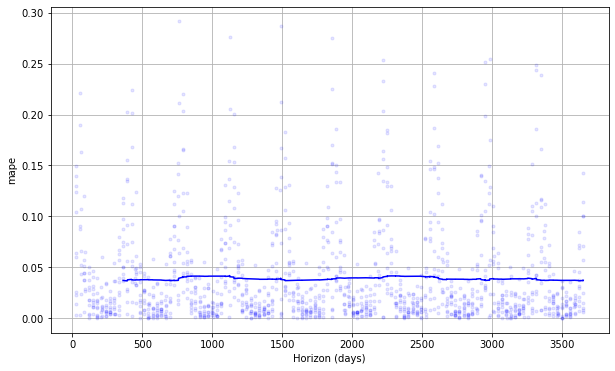

In [37]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [18]:
import pickle
with open('forecast_model.pckl', 'wb') as fout:
    pickle.dump(model, fout)
with open('forecast_model.pckl', 'rb') as fin:
    m2 = pickle.load(fin)

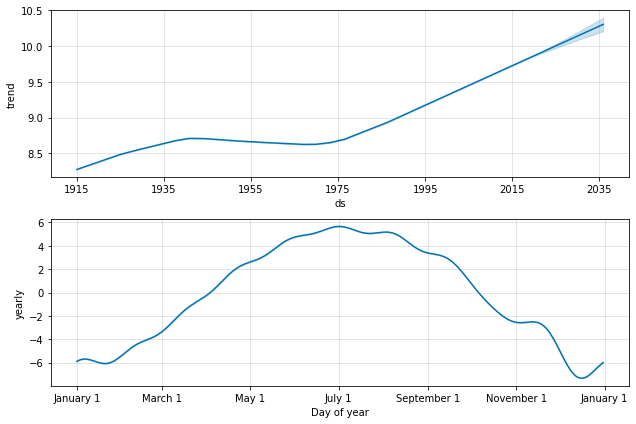

In [22]:
fig3 = model.plot_components(forecast2)

In [23]:
#model also works in one singel date

future_date = pd.DataFrame({'ds':['2020-08-15']})
forecast = m.predict(future_date)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2020-08-15,14.460674,14.051064,14.868797


In [20]:
from flask import Flask, jsonify, request
from flask_cors import CORS, cross_origin

In [21]:
app = Flask(__name__)
CORS(app)

@app.route("/api/v1.0/forecast", methods=['POST'])
def predict():
    horizon = int(request.json['horizon'])
    
    future2 = m.make_future_dataframe(periods=horizon)
    forecast2 = m.predict(future2)
    
    data = forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-horizon:]
    
    ret = data.to_json(orient='records', date_format='iso')
    
    return ret

# running REST interface, port=3000 for direct test
if __name__ == "__main__":
    app.run(debug=False, host='0.0.0.0', port=3000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://0.0.0.0:3000/ (Press CTRL+C to quit)
